   # TP53: Effects of Mutation on Interacting Proteins

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

### List of proteins that interact with TP53 (according to Uniprot and String)

In [4]:
gene = 'TP53'
protList = ['AXIN1', 'EP300', 'HRMT1L2', 'CARM1', 'TAF1', 'ING4', 'CABLES1', 
            'TP73', 'HIPK1', 'HIPK2', 'TP53INP1', 'TP53BP', 'WWOX', 'HCV', 'USP7', 'SYVN1', 'HSP90AB1',
           'CHD8', 'ARMC10', 'BANP', 'CDKN2AIP', 'NUAK1', 'STK11', 'LKB1', 'UHRF2', 'E4F1', 'YWHAZ',
           'MAML1', 'MKRN1', 'PML', 'MDM2', 'FBXO42', 'ATM', 'PP2R2A', 'AURKA', 'DAXX', 'BRD7', 'TRIM24',
           'L3MBTL1', 'GRK5', 'CAK', 'PTK2B', 'PYK2', 'MDM2', 'PRKCG', 'PPIF', 'KAT6A', 'UBC9', 'ZNF385B',
           'ZNF385A', 'ANKRD2', 'RFFL', 'RNF34', 'MTA1', 'COP1', 'CCAR2', 'MORC3', 'POU4F2', 'AFG1L', 'UBD',
           'TAF6', 'HPV', 'UL123', 'E1B-55K', 'BAX', 'FAS', 'BCL2', 'CREBBP', 'CDK2', 'MDM2', 'CDKN2A', 
            'CDKN1A', 'ATM', 'MDM4']

### t-test for proteome abundance of these proteins when TP53 is mutated
<b>Note: We are only interested in looking at proteins whose abundance is significantly affected by TP53 mutation, and we must do a Bonferroni correction on our p-value</b>

In [5]:
pcutoff = 0.05 / len(protList)

In [6]:
significantResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.merge_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            significantResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for CABLES1: 
Ttest_indResult(statistic=-3.929885671934063, pvalue=0.0001378458722101749)
Test for HSP90AB1: 
Ttest_indResult(statistic=4.297997992864394, pvalue=3.367565381594231e-05)
Test for CHD8: 
Ttest_indResult(statistic=4.2478330401531235, pvalue=4.10099109905482e-05)
Test for UHRF2: 
Ttest_indResult(statistic=-4.113642044468606, pvalue=6.894129428035211e-05)
Test for AURKA: 
Ttest_indResult(statistic=4.660432733263899, pvalue=1.26014474892994e-05)


### List of significantly affected proteins

In [7]:
print(significantResults)

['CABLES1', 'HSP90AB1', 'CHD8', 'UHRF2', 'AURKA']


### Build the dataframe for plotting

In [17]:
plotdf = CPTAC.merge_mutations(proteomics, gene)[['Mutation', gene]]

for protein in significantResults:
    proteindf = CPTAC.merge_mutations(proteomics, protein, gene)[[protein]]
    plotdf = plotdf.join(proteindf)
    
print(plotdf.head(50))

               Mutation  TP53  CABLES1  HSP90AB1  CHD8  UHRF2  AURKA
S001  Missense_Mutation  0.32     0.08      0.42 -0.11   0.01    NaN
S002           Wildtype  0.28     0.10      0.19  0.28  -0.37   0.38
S003           Wildtype -0.83    -0.13      0.13 -0.14   0.05    NaN
S004           Wildtype -0.32     0.31      0.75  0.13  -0.18  -0.73
S005  Missense_Mutation  3.05    -1.39      0.30  0.21  -0.85   3.19
S006           Wildtype -0.11    -0.66     -0.48  0.10  -0.26  -1.58
S007  Missense_Mutation  0.48     0.72     -0.06  0.20   0.03    NaN
S008  Nonsense_Mutation -0.91    -0.34      0.55  1.05   0.51   0.91
S009           Wildtype -0.05    -0.26     -0.42  0.09  -0.32  -1.66
S010           Wildtype -0.15     0.24      0.00  0.18  -0.05    NaN
S011           Wildtype  0.04     0.19      0.14 -0.05  -0.35    NaN
S012    Frame_Shift_Del  0.38    -1.43      1.00  0.25  -0.53   1.33
S013           Wildtype -0.21    -0.07     -0.18  0.04  -0.23   0.16
S014  Missense_Mutation  3.61    -

In [19]:
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Missense'
                                     }})
plotdf.head(50)

Mutation  TP53  CABLES1  HSP90AB1  CHD8  UHRF2  AURKA
S001      Missense  0.32     0.08      0.42 -0.11   0.01    NaN
S002       Control  0.28     0.10      0.19  0.28  -0.37   0.38
S003       Control -0.83    -0.13      0.13 -0.14   0.05    NaN
S004       Control -0.32     0.31      0.75  0.13  -0.18  -0.73
S005      Missense  3.05    -1.39      0.30  0.21  -0.85   3.19
S006       Control -0.11    -0.66     -0.48  0.10  -0.26  -1.58
S007      Missense  0.48     0.72     -0.06  0.20   0.03    NaN
S008    Truncating -0.91    -0.34      0.55  1.05   0.51   0.91
S009       Control -0.05    -0.26     -0.42  0.09  -0.32  -1.66
S010       Control -0.15     0.24      0.00  0.18  -0.05    NaN
S011       Control  0.04     0.19      0.14 -0.05  -0.35    NaN
S012    Truncating  0.38    -1.43      1.00  0.25  -0.53   1.33
S013       Control -0.21    -0.07     -0.18  0.04  -0.23   0.16
S014      Missense  3.61    -0.63      0.73  0.36  -0.43   0.34
S015      Missense  1.71     0.00      1.00  0.61  -0.43   2.21
S016       Control -0.22    -0.05      0.05  0.16  -0.29    NaN
S017       Control  0.03    -0.09      0.09  0.04  -0.16    NaN
S018       Control -0.10    -1.14     -0.37 -0.05  -0.21  -0.26
S019      Missense  0.40    -0.41      0.01  0.11  -0.10    NaN
S020       Control -0.19    -0.19     -0.31  0.47   0.05  -1.15
S021    Truncating -0.31    -0.23      0.34 -0.06  -0.65  -0.12
S022       Control -0.23    -0.55      0.49  0.58  -0.07   1.36
S023       Control -0.25     0.15      0.22  0.14   0.03   0.12
S024       Control -0.48     0.67      0.32 -0.02  -0.21  -0.74
S025       Control -0.42     0.08      0.03 -0.01   0.00    NaN
S026       Control  0.15    -0.35     -0.32 -0.43  -0.17    NaN
S027       Control -0.54     0.00     -0.45 -0.07   0.53  -0.08
S028       Control -0.02    -0.25     -0.50 -0.24  -0.31   0.04
S029       Control  0.81     0.01      0.12  0.16  -0.24   0.93
S030  In_Frame_Del  1.59     0.00      0.07 -0.02  -0.38   0.93
S031       Control  0.00     0.01      0.03  0.00  -0.27   0.07
S032       Control -0.40     0.61      0.72 -0.12  -0.43    NaN
S033       Control   NaN     0.01     -0.02 -0.02   0.25    NaN
S034       Control  0.26    -0.36     -0.50  0.08  -0.07    NaN
S035       Control  0.30     0.11     -0.34 -0.02   0.03  -0.62
S036       Control  0.93    -0.01      0.24 -0.10   0.06    NaN
S037       Control   NaN     0.07     -0.49  0.30  -0.01   0.27
S038       Control -0.17     0.19      0.00 -0.05  -0.11    NaN
S039       Control   NaN    -0.02      0.23 -0.02  -0.09    NaN
S040    Truncating   NaN    -1.04      0.34  0.02  -0.18    NaN
S041    Truncating -0.15    -0.33      0.21  0.76   0.43   0.47
S042      Missense  0.81    -0.23     -0.14 -0.14   0.33  -0.29
S043       Control   NaN    -0.16     -0.20 -0.30  -0.07  -0.25
S044       Control -0.75    -0.33     -0.19  0.11  -0.18    NaN
S045       Control   NaN     0.23      0.01  0.04   0.09   0.61
S046       Control  0.32     0.11     -0.17 -0.10   1.12  -0.77
S047       Control  0.55     0.18     -0.03 -0.06   0.13  -0.41
S048      Missense  0.13    -0.38      0.11  0.14  -0.46  -0.18
S049       Control -0.10    -0.47      0.00  0.07   0.03    NaN
S050       Control  0.99    -0.66     -0.14  0.04  -0.07    NaN

In [20]:
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Protein', value_name='Proteomics')
plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)
plotdf

Mutation Protein  Proteomics
0      Missense    TP53        0.32
1       Control    TP53        0.28
2       Control    TP53       -0.83
3       Control    TP53       -0.32
4      Missense    TP53        3.05
5       Control    TP53       -0.11
6      Missense    TP53        0.48
7    Truncating    TP53       -0.91
8       Control    TP53       -0.05
9       Control    TP53       -0.15
10      Control    TP53        0.04
11   Truncating    TP53        0.38
12      Control    TP53       -0.21
13     Missense    TP53        3.61
14     Missense    TP53        1.71
15      Control    TP53       -0.22
16      Control    TP53        0.03
17      Control    TP53       -0.10
18     Missense    TP53        0.40
19      Control    TP53       -0.19
20   Truncating    TP53       -0.31
21      Control    TP53       -0.23
22      Control    TP53       -0.25
23      Control    TP53       -0.48
24      Control    TP53       -0.42
25      Control    TP53        0.15
26      Control    TP53       -0.54
27      Control    TP53       -0.02
28      Control    TP53        0.81
30      Control    TP53        0.00
..          ...     ...         ...
792    Missense   AURKA        0.78
794     Control   AURKA        0.21
795     Control   AURKA        0.31
796    Missense   AURKA        0.54
797     Control   AURKA        0.30
798    Missense   AURKA        1.28
799    Missense   AURKA        0.41
802     Control   AURKA       -0.78
803     Control   AURKA       -1.28
805     Control   AURKA       -0.77
807     Control   AURKA       -0.71
809     Control   AURKA       -0.89
811     Control   AURKA       -0.19
812     Control   AURKA       -1.42
813     Control   AURKA       -0.55
817     Control   AURKA       -0.76
818     Control   AURKA       -1.10
821     Control   AURKA       -0.22
822     Control   AURKA       -0.56
824     Control   AURKA        0.20
825     Control   AURKA       -0.99
826     Control   AURKA       -1.92
827     Control   AURKA       -1.62
828     Control   AURKA       -0.62
829     Control   AURKA       -0.12
833     Control   AURKA       -2.56
834     Control   AURKA        0.20
835     Control   AURKA       -1.89
837     Control   AURKA        0.44
839     Control   AURKA       -0.47

[757 rows x 3 columns]

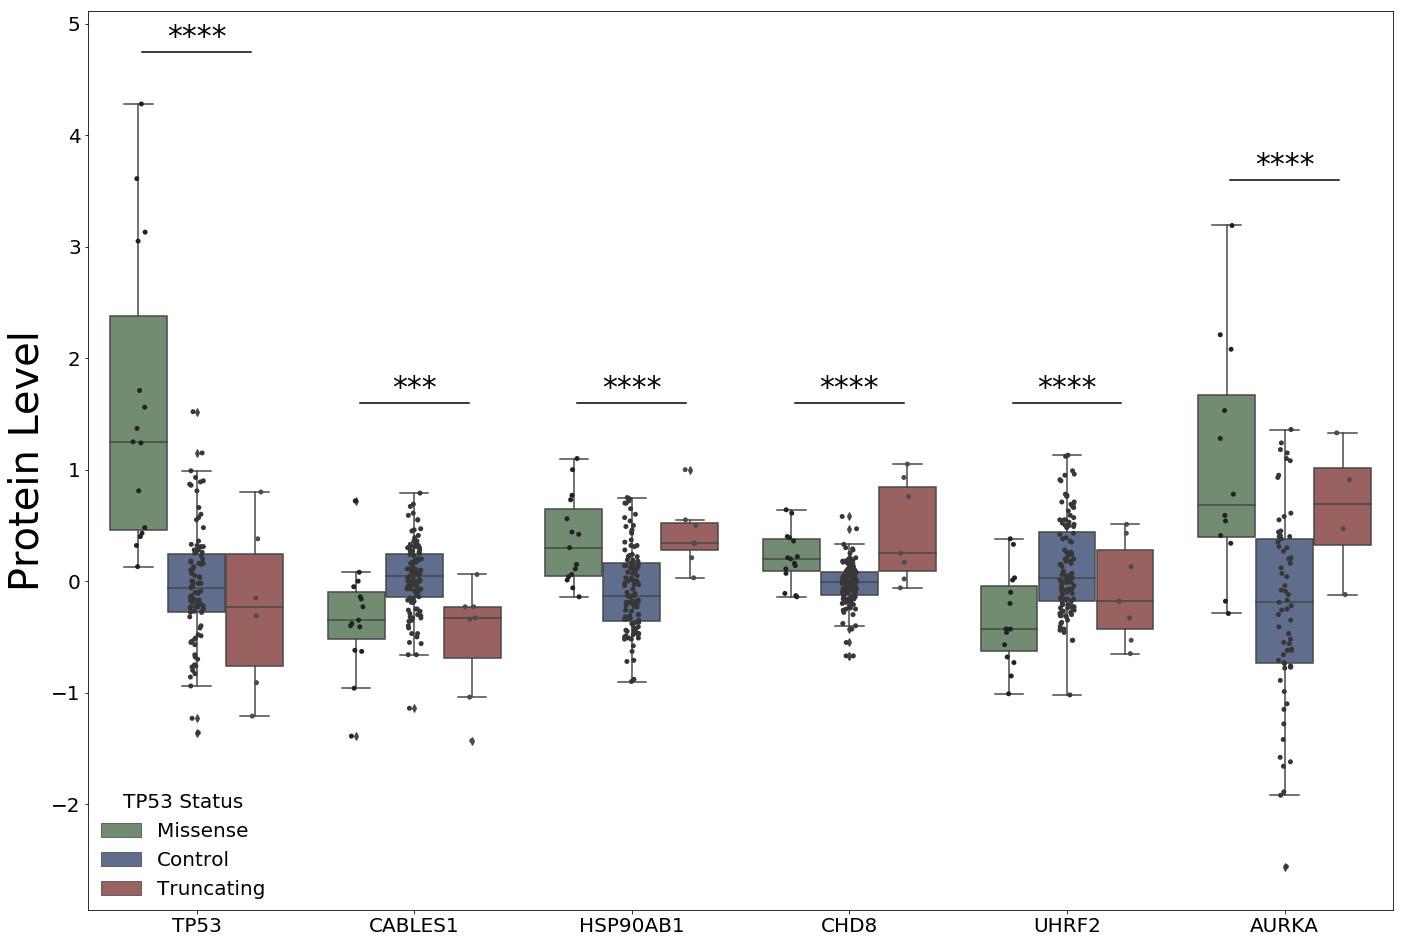

In [64]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Missense": "#6C906D", "Control": "#596B94", "Truncating": "#A35857"}

#Create the plot
boxplt = sns.boxplot(x='Protein', y='Proteomics', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Protein', y='Proteomics', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Protein Level', fontsize='40')
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], ['Missense', 'Control', 'Truncating'], title='TP53 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
boxplt.get_legend().set_bbox_to_anchor((0.15, 0.15, 0, 0))

#Add significance indicator: TP53
x1, x2 = -0.25, 0.25
y, h, col = 4 + .45, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='30')

#Add significance indicator: CABLES1
x1, x2 = 0.75, 1.25
y, h, col = 1 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col, fontsize='30')

#Add significance indicator: HSP90AB1
x1, x2 = 1.75, 2.25
y, h, col = 1 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='30')

#Add significance indicator: CHD8
x1, x2 = 2.75, 3.25
y, h, col = 1 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='30')

#Add significance indicator: UHRF2
x1, x2 = 3.75, 4.25
y, h, col = 1 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='30')

#Add significance indicator: AURKA
x1, x2 = 4.75, 5.25
y, h, col = 3 + .3, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='30')

plt.show()

## Phosphoproteome abundance of interacting proteins

### This is the same list as before, with some of the end numbers of the proteins removed; less specificity in protein names captures more potentially significant results in the phosphoproteomic data

In [ ]:
phosProtList = ['AXIN1', 'EP300', 'HRMT1L2', 'CARM1', 'TAF1', 'ING4', 'CABLES1', 
            'TP73', 'HIPK1', 'HIPK2', 'TP53INP1', 'TP53BP', 'WWOX', 'HCV', 'USP7', 'SYVN1', 'HSP90AB1',
           'CHD8', 'ARMC10', 'BANP', 'CDKN2AIP', 'NUAK1', 'STK11', 'LKB1', 'UHRF2', 'E4F1', 'YWHAZ',
           'MAML1', 'MKRN1', 'PML', 'MDM2', 'FBXO42', 'ATM', 'PP2R2A', 'AURKA', 'DAXX', 'BRD7', 'TRIM24',
           'L3MBTL1', 'GRK5', 'CAK', 'PTK2B', 'PYK2', 'MDM2', 'PRKCG', 'PPIF', 'KAT6A', 'UBC9', 'ZNF385B',
           'ZNF385A', 'ANKRD2', 'RFFL', 'RNF34', 'MTA1', 'COP1', 'CCAR2', 'MORC3', 'POU4F2', 'AFG1L', 'UBD',
           'TAF6', 'HPV', 'UL123', 'E1B-55K', 'BAX', 'FAS', 'BCL2', 'CREBBP', 'CDK2', 'MDM2', 'CDKN2A', 
            'CDKN1A', 'ATM', 'MDM4']

In [ ]:
significantPhosResults = [];

for protein in phosProtList:
    phosSitesdf = CPTAC.merge_mutations(phos, protein, gene)

### List of significantly affected phosphorylation sites

In [ ]:
print(sigPhosResults)